# Dinámica del Amor

Se modela el estado emotivo de dos amantes, al paso del tiempo.

<table>
    <tr>
        <td>
            <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Altichiero%2C_ritratto_di_Francesco_Petrarca.jpg/192px-Altichiero%2C_ritratto_di_Francesco_Petrarca.jpg" />
        </td>
        <td>
            <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/48/Francesco_Petrarca01.jpg/200px-Francesco_Petrarca01.jpg" />
        </td>
    </tr>
</table>

In [1]:
# Para hacer experimentos numéricos importamos numpy
import numpy as np
import pandas as pd

# y biblioteca para plotear
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# cómputo simbólico con sympy
from sympy import *
init_printing()

## Tasa de cambio del estado emotivo de Laura

$\frac{dL(t)}{dt}=-\alpha_{1}L(t)+R_{L}(P(t))+\beta_{1}A_{P}$

## Tasa de cambio del estado emotivo de Petrarca
$\frac{dP(t)}{dt}=-\alpha_{2}L(t)+R_{p}(L(t))+\beta_{2}\frac{A_{L}}{1+\delta Z(t)}$

## Tasa de cambio de la inspiración del Poeta
$\frac{dZ(t)}{dt}=-\alpha_{3}Z(t)+\beta_{3}P(t)$

## Reacción del Poeta a Laura
$R_{P}(L)=\gamma_{2}L$

## Reacción de la Bella al Poeta
$R_{L}(P)=\beta_{1}P\left(1-\left(\frac{P}{\gamma}\right)^{2}\right)$

In [2]:
def reaccion_laura(p, gamma):
    return beta1* p * (1 - (p/gamma)**2)

def reaccion_petrarca(l, gamma2):
    return gamma2 * l

def dlaura(alpha1, beta1, atractivo_petrarca):
    def dl(t, L, P):
        return -alpha1 * L[t] + reaccion_laura(P[t], gamma=beta1) + beta1 * atractivo_petrarca
    return dl

def dpetrarca(alpha2, beta2, atractivo_laura, delta=1):
    def dp(t, L, Z):
        return -alpha2*L[t] + reaccion_petrarca(L[t], gamma2=beta2) + beta2 * (atractivo_laura/(1 + delta * Z[t]))
    return dp

def dinspiracion_petrarca(alpha3, beta3):
    def dz(t, P, Z):
        return -alpha3*Z[t] + beta3*P[t]
    return dz

$\alpha_{1}>\alpha_{2}>\alpha_{3}$

In [3]:
alpha3 = 1.2 / 10
alpha2 = 1.2
alpha1 = 3 * alpha2

beta1 = 1.2
beta2 = 6
beta3 = 12

atractivo_petrarca = 1
atractivo_laura = 2

In [4]:
dl = dlaura(alpha1, beta1, atractivo_petrarca)
dp = dpetrarca(alpha2, beta2, atractivo_laura)
dz = dinspiracion_petrarca(alpha3, beta3)

In [10]:
L = np.zeros(20)
P = np.zeros(20)
Z = np.zeros(20)

In [11]:
for t in range(1, 20):
    L[t] = L[t-1] + dl(t, L, P)
    P[t] = P[t-1] + dp(t, L, Z)
    Z[t] = Z[t-1] + dz(t, P, Z)

In [12]:
f = pd.DataFrame()
pd.DataFrame({'P': P.tolist(), 'Z': Z.tolist(), 'L': L.tolist()})

,L,P,Z
0,0.0,0.00,0.00
1,1.2,17.76,213.12
2,2.4,41.28,708.48
3,3.6,70.56,1555.20
4,4.8,105.60,2822.40
5,6.0,146.40,4579.20
6,7.2,192.96,6894.72
7,8.4,245.28,9838.08
8,9.6,303.36,13478.40
9,10.8,367.20,17884.80


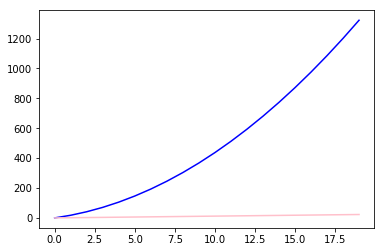

In [13]:
plt.plot(range(20), P, color='blue')
#plt.plot(range(20), Z, color='teal')
plt.plot(range(20), L, color='pink')